In [1]:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 10
plt.rcParams["font.family"] = "NanumGothicCoding"
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False
import seaborn as sns
from plotnine import *
import missingno as msno
%matplotlib inline

공공 데이터 상권 정보 분석하기 => https://www.data.go.kr/dataset/15012005/fileData.do

In [11]:
# 2016년 상권별 업종밀집 통계 => 상권별 밀집도를 보여준다
# encoding 속성을 생략하면 'utf-8'이 기본값으로 사용된다. 'utf-8'로 읽어오지 못한다면 encoding 속성값을 'euc-kr', 'cp949',
# 'ms949'로 변경해서 읽는다.
# shop = pd.read_csv('./data/shop_2016.csv', encoding='euc-kr', engine='python')
shop = pd.read_csv('./data/shop_2016.csv', encoding='ms949')
shop

상권명칭  상권번호    관리년월    대분류명    중분류명  과밀지수(밀집도)
0              강릉역광장_2  2523  201601      소매  가전제품소매     1.0818
1                구미역_3  1149  201601      소매  가전제품소매     0.8865
2       전북 전주시 중화산1동_1   768  201601      소매  가전제품소매     1.1757
3              충청북도청_2  1309  201601      소매  가전제품소매     0.3574
4        충북 청주시 복대1동_1  1311  201601      소매  가전제품소매     0.6849
...                ...   ...     ...     ...     ...        ...
805676    경남 양산시 덕계동_1   626  201612      소매     NaN     1.2906
805677   경북 구미시 신평1동_2  1143  201612  업종분류불능     NaN     0.5677
805678           안양역_5  1663  201612      소매     NaN     1.6597
805679             양산역   616  201612      소매     NaN     1.4103
805680           망포역_2  1473  201612  업종분류불능     NaN     0.7113

[805681 rows x 6 columns]

In [12]:
shop_2018_06 = pd.read_csv('./data/shop_201806_01.csv', encoding='cp949')
shop_2018_06.shape

(499328, 39)

In [13]:
shop_2018_06.head()

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0  19905471         와라와라호프         NaN         Q       음식       Q09      유흥주점   
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12    커피점/카페   
2  19911801           프로포즈         NaN         Q       음식       Q09      유흥주점   
3  19912201       싱싱커피&토스트         NaN         Q       음식       Q07     패스트푸드   
4  19932756       가락사우나내스낵         NaN         F    생활서비스       F09  대중목욕탕/휴게   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                     건물관리번호       건물명  \
0    Q09A01        호프/맥주   I56219  ...  1168010600106040000014378      대치상가   
1    Q12A01  커피전문점/카페/다방   I56220  ...  1168010100106960042022041       NaN   
2    Q09A01        호프/맥주   I56219  ...  1154510200101620001017748       NaN   
3    Q07A10        토스트전문   I56192  ...  2653010400105780000002037  산업용품유통상가   
4    F09A02   사우나/증기탕/온천   S96121  ...  1171010500102560005010490       NaN   

                  도로명주소   구우편번호    신우편번호  동정보 층정보  호정보          경도         위도  
0  서울특별시 강남구 남부순환로 2933  135280   6280.0  NaN   1  NaN  127.061026  37.493922  
1    서울특별시 강남구 선릉로93길 6  135080   6149.0  NaN   1  NaN  127.047883  37.505675  
2    서울특별시 금천구 가산로 34-6  153010   8545.0  NaN   1  NaN  126.899220  37.471711  
3      부산광역시 사상구 괘감로 37  617726  46977.0  NaN   1   26  128.980455  35.159774  
4      서울특별시 송파구 가락로 71  138846   5690.0  NaN   1  NaN  127.104071  37.500249  

[5 rows x 39 columns]

In [14]:
shop_2018_06.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [15]:
# 분석 작업에 필요한 column만 추려낸다.
view_columns = ['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명',
               '행정동명', '법정동명', '지번주소', '도로명주소', '경도', '위도']
shop_2018_06[view_columns].head()

상호명         지점명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명 시군구명  \
0         와라와라호프         NaN       음식      유흥주점        호프/맥주  서울특별시  강남구   
1  커피빈코리아선릉로93길점  코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구   
2           프로포즈         NaN       음식      유흥주점        호프/맥주  서울특별시  금천구   
3       싱싱커피&토스트         NaN       음식     패스트푸드        토스트전문  부산광역시  사상구   
4       가락사우나내스낵         NaN    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   

   행정동명 법정동명                  지번주소                 도로명주소          경도  \
0  대치1동  대치동     서울특별시 강남구 대치동 604  서울특별시 강남구 남부순환로 2933  127.061026   
1  역삼1동  역삼동  서울특별시 강남구 역삼동 696-42    서울특별시 강남구 선릉로93길 6  127.047883   
2  독산3동  독산동   서울특별시 금천구 독산동 162-1    서울특별시 금천구 가산로 34-6  126.899220   
3   괘법동  괘법동     부산광역시 사상구 괘법동 578      부산광역시 사상구 괘감로 37  128.980455   
4   석촌동  석촌동     서울특별시 송파구 석촌동 256      서울특별시 송파구 가락로 71  127.104071   

          위도  
0  37.493922  
1  37.505675  
2  37.471711  
3  35.159774  
4  37.500249

In [16]:
shop_2018_06.isnull().sum()

상가업소번호            0
상호명               1
지점명          432587
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      28731
표준산업분류명       28731
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         86552
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        434501
건물관리번호            0
건물명          274150
도로명주소             0
구우편번호             0
신우편번호             9
동정보          455420
층정보          191133
호정보          427356
경도                0
위도                0
dtype: int64

In [17]:
msno.matrix(shop_2018_06)

<AxesSubplot:>

In [18]:
msno.matrix(shop_2018_06[view_columns])

<AxesSubplot:>

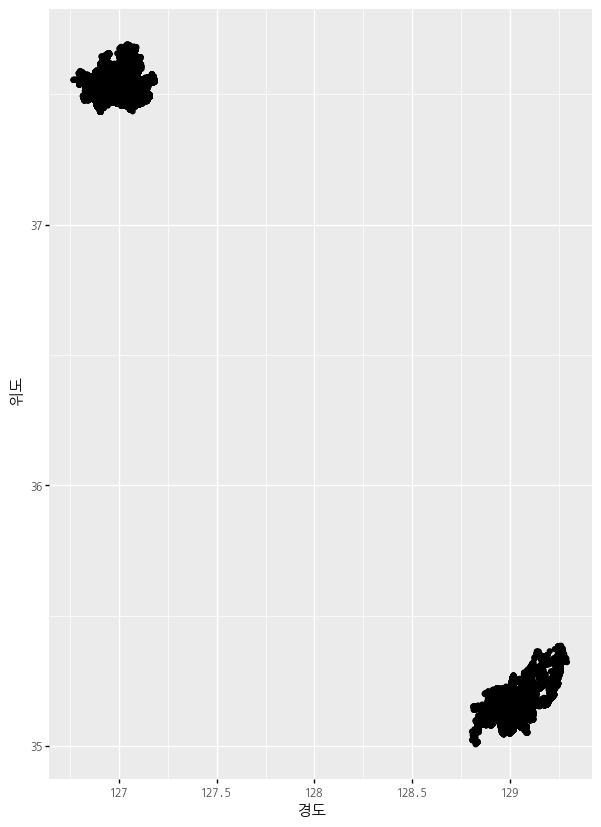

<ggplot: (94341640470)>

In [24]:
ggplot(shop_2018_06, aes(x='경도', y='위도')) \
    + geom_point() \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(7, 10))

<AxesSubplot:xlabel='경도', ylabel='위도'>

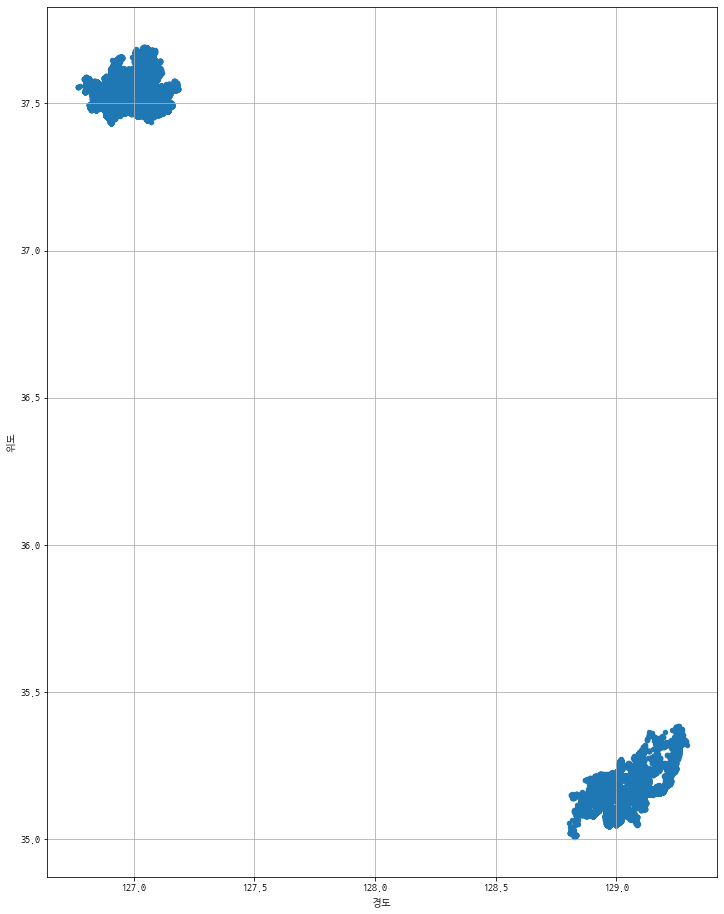

In [25]:
shop_2018_06.plot.scatter(x='경도', y='위도', grid=True, figsize=(12, 16))

In [33]:
# 데이터를 시각화 시켜보니 서울과 부산만 있는거 같다. => 그래서 서울과 그 이외의 데이터로 나눈다.
shop_seoul = shop_2018_06.loc[shop_2018_06['도로명주소'].str.startswith('서울')]
shop_seoul.head()

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0  19905471         와라와라호프         NaN         Q       음식       Q09      유흥주점   
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12    커피점/카페   
2  19911801           프로포즈         NaN         Q       음식       Q09      유흥주점   
4  19932756       가락사우나내스낵         NaN         F    생활서비스       F09  대중목욕탕/휴게   
5  19975850           허술한집         NaN         Q       음식       Q04        분식   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                     건물관리번호   건물명  \
0    Q09A01        호프/맥주   I56219  ...  1168010600106040000014378  대치상가   
1    Q12A01  커피전문점/카페/다방   I56220  ...  1168010100106960042022041   NaN   
2    Q09A01        호프/맥주   I56219  ...  1154510200101620001017748   NaN   
4    F09A02   사우나/증기탕/온천   S96121  ...  1171010500102560005010490   NaN   
5    Q04A01       라면김밥분식   I56194  ...  1150010800100450031005883   NaN   

                  도로명주소   구우편번호   신우편번호  동정보 층정보  호정보          경도         위도  
0  서울특별시 강남구 남부순환로 2933  135280  6280.0  NaN   1  NaN  127.061026  37.493922  
1    서울특별시 강남구 선릉로93길 6  135080  6149.0  NaN   1  NaN  127.047883  37.505675  
2    서울특별시 금천구 가산로 34-6  153010  8545.0  NaN   1  NaN  126.899220  37.471711  
4      서울특별시 송파구 가락로 71  138846  5690.0  NaN   1  NaN  127.104071  37.500249  
5    서울특별시 강서구 공항대로3길 9  157812  7619.0  NaN   1  NaN  126.809957  37.562013  

[5 rows x 39 columns]

In [37]:
# '~'는 ~가 아닌것을 의미한다.
shop_except_seoul = shop_2018_06.loc[~shop_2018_06['도로명주소'].str.startswith('서울')]
shop_except_seoul.head()

상가업소번호       상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
3   19912201  싱싱커피&토스트  NaN         Q       음식       Q07    패스트푸드    Q07A10   
22  20047434    경부할인마트  NaN         D       소매       D03    종합소매점    D03A06   
23  20037352       마니쩜  NaN         Q       음식       Q09     유흥주점    Q09A01   
24  20038373     경주아구찜  NaN         Q       음식       Q03   일식/수산물    Q03A06   
30  20031733  동해제일산오징어  NaN         Q       음식       Q03   일식/수산물    Q03A13   

   상권업종소분류명 표준산업분류코드  ...                     건물관리번호       건물명  \
3     토스트전문   I56192  ...  2653010400105780000002037  산업용품유통상가   
22     종합소매   G47190  ...  2617010100107940681015812       NaN   
23    호프/맥주   I56219  ...  2623011000104500002043836     가남아파트   
24     아구전문   I56111  ...  2650010500103570010019103       NaN   
30   낙지/오징어   I56111  ...  2626010800113800002003460       NaN   

                       도로명주소   구우편번호    신우편번호  동정보 층정보  호정보          경도  \
3           부산광역시 사상구 괘감로 37  617726  46977.0  NaN   1   26  128.980455   
22          부산광역시 동구 망양로 593  601831  48716.0  NaN   1  NaN  129.034599   
23       부산광역시 부산진구 대학로 64-1  614010  47336.0  NaN   2  NaN  129.034302   
24       부산광역시 수영구 수영로 381-8  613010  48318.0  NaN   1  NaN  129.106330   
30  부산광역시 동래구 아시아드대로220번길 30  607060  47838.0  NaN   1  NaN  129.068324   

           위도  
3   35.159774  
22  35.123196  
23  35.150069  
24  35.141176  
30  35.202902  

[5 rows x 39 columns]

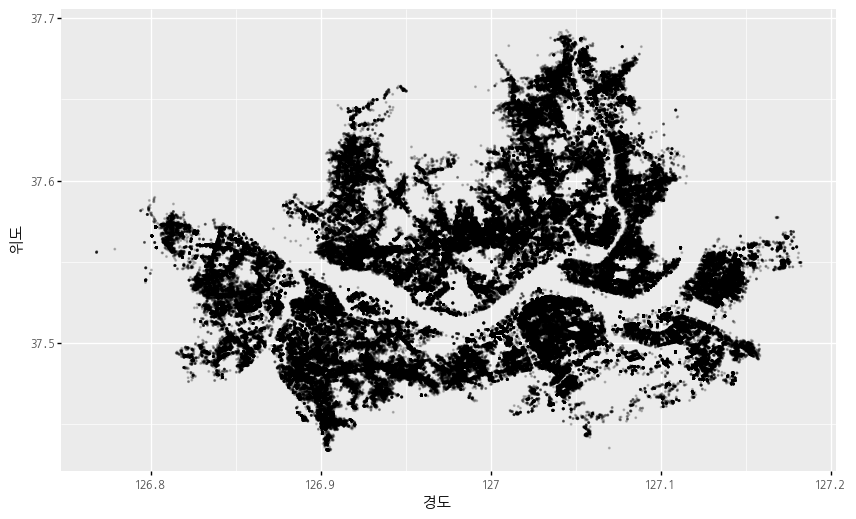

<ggplot: (-9223371942400081976)>

In [36]:
# 서울만 찍어봤더니 서울 지도하고 비슷하게 나온다.
ggplot(shop_seoul, aes(x='경도', y='위도')) \
    + geom_point(size=0.2, alpha=0.2) \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))

<AxesSubplot:xlabel='경도', ylabel='위도'>

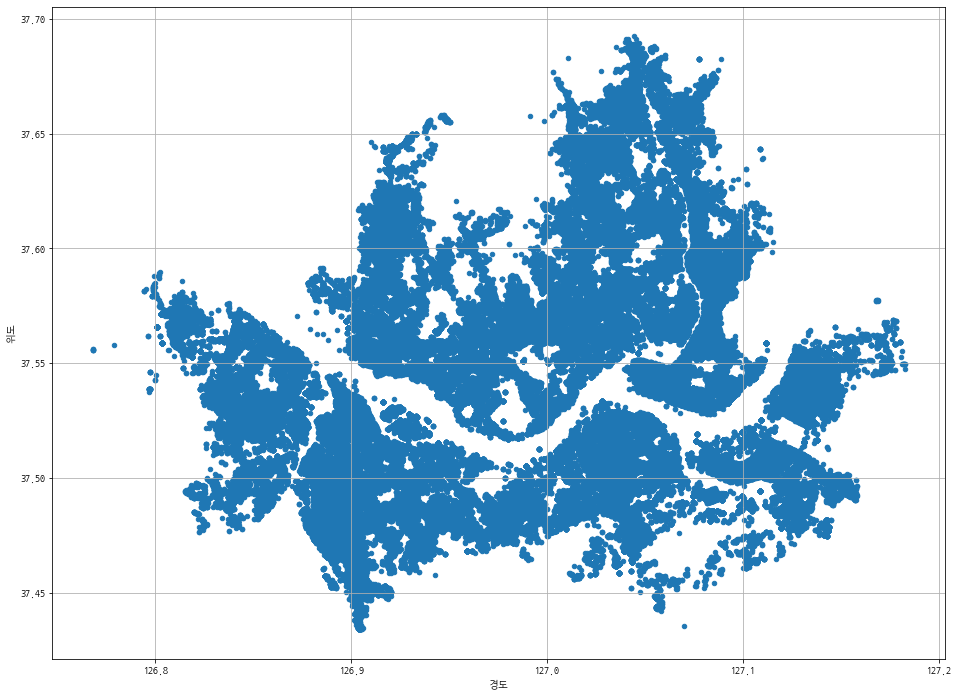

In [38]:
shop_seoul.plot.scatter(x='경도', y='위도', grid=True, figsize=(16, 12))

In [45]:
# 데이터프레임의 도로명 주소를 활용해서 '시도', '구군' 열을 만든다.
# str.split() 메소드에 expand=True 옵션을 지정해서 구분자를 경계로 문자열을 서로 다른 열(데이터프레임)로 구분해서 '시도' 열과
# '구군' 열을 만든다.
# expand=True 옵션을 지정하면 구분자를 경계로 문자열을 구분해서 데이터프레임 타입으로 출력한다. => 여러개의 열로 나눈다.
# print(type(shop_seoul[:1]['도로명주소'].str.split(' ', expand=True)))
# print(shop_seoul[:1]['도로명주소'].str.split(' ', expand=True)[0])
# print(shop_seoul[:1]['도로명주소'].str.split(' ', expand=True)[1])

shop_2018_06['시도'] = shop_2018_06['도로명주소'].str.split(' ', expand=True)[0]
shop_2018_06['구군'] = shop_2018_06['도로명주소'].str.split(' ', expand=True)[1]
shop_2018_06.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도', '시도', '구군'],
      dtype='object')

In [46]:
# '시도' 열과 '구군' 열이 추가된 원본 데이터프레임에서 서울만 추출해 서울 데이터프레임을 다시 만들어준다.
shop_seoul = shop_2018_06.loc[shop_2018_06['도로명주소'].str.startswith('서울')]

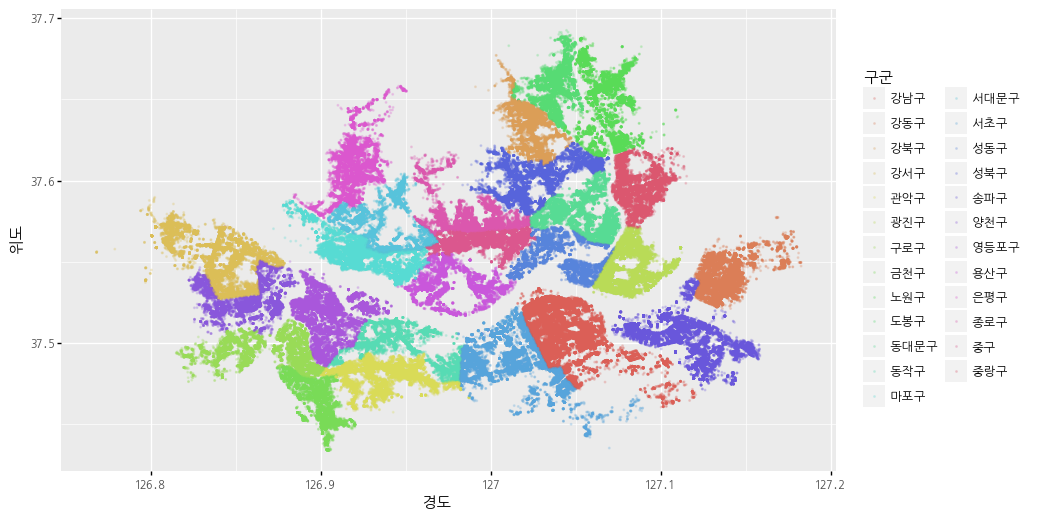

<ggplot: (94255085327)>

In [48]:
ggplot(shop_seoul, aes(x='경도', y='위도', color='구군')) \
    + geom_point(size=0.2, alpha=0.2) \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))

<AxesSubplot:xlabel='경도', ylabel='위도'>

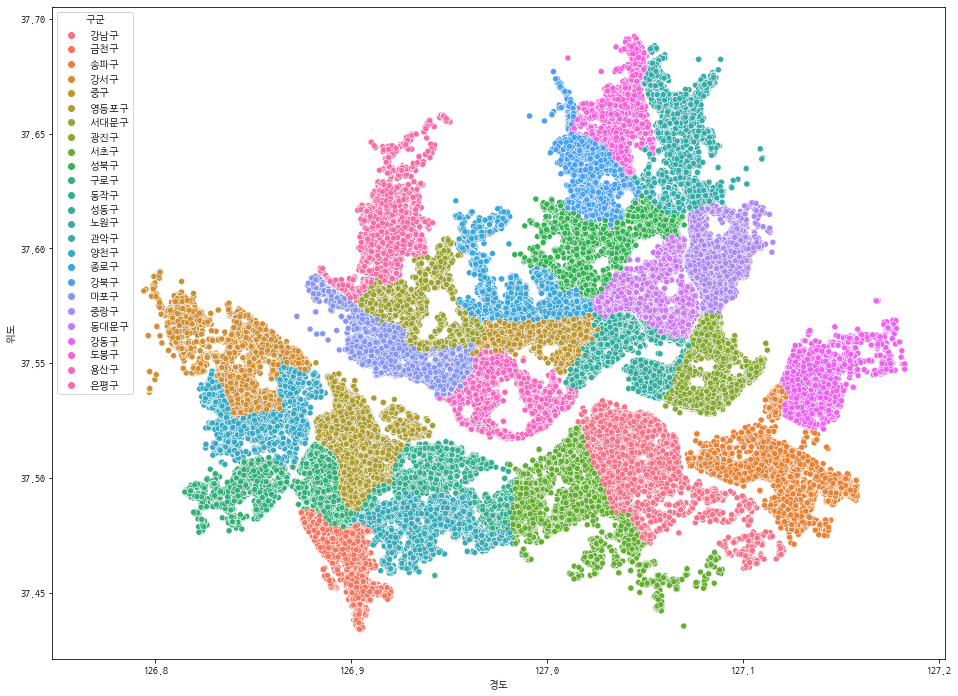

In [52]:
# seaborn 라이브러리를 이용한 시각화
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul, x='경도', y='위도', hue='구군')

In [55]:
ggplot(shop_seoul, aes(x='경도', y='위도', color='상권업종대분류명')) \
    + geom_point(size=0.2, alpha=0.2) \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6)) \
    + scale_fill_gradient(low='blue', high='green')

<ggplot: (94254866408)>

In [56]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul, x='경도', y='위도', hue='상권업종대분류명')

<AxesSubplot:xlabel='경도', ylabel='위도'>

In [58]:
# 학문/교육과 관련된 정보 보기
shop_seoul_edu = shop_seoul[shop_seoul['상권업종대분류명'] == '학문/교육']
shop_seoul_edu.shape

(27717, 41)

In [61]:
ggplot(shop_seoul_edu, aes(x='경도', y='위도', color='상권업종중분류명')) \
    + geom_point(size=0.2, alpha=0.2) \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))

<ggplot: (-9223371942413282637)>

In [62]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul_edu, x='경도', y='위도', hue='상권업종중분류명')

<AxesSubplot:xlabel='경도', ylabel='위도'>